# **FINAL PROJECT 1** - Regression

Kelompok 8 - PYTN 012
- DWI PUJINING TYAS
- NUR ANISAH
- FATIMAH ZAHRA

## Perkenalan
Dengan banyaknya faktor yang digunakan dalam penentuan besarnya harga taksi, dan bagaimana harga taksi kedepannya akan berubah seiring dengan berubahnya faktor yang mendukung, maka diperlukan adanya prediksi untuk menentukan harga taksi tersebut. 

Maka dari itu kami memprediksi besaran harga taksi dengan 693071 data yang kami gunakan dengan 10 atribut yang paling berpengaruh dalam 
prediksi harga taksi online dari 57 atribut yang ada, diantaranya adalah cab_type, name, source, destination, distance, short_summary, surge_multiplier, visibility, windBearing, moonPhase. Data tersebut diambil dari Data Uber and Lyft Dataset Boston, MA yang diperoleh dari Kaggle. 


Tentu saja objective yang ingin dicapai adalah besaran dari harga taksi, dimana harga tersebut diperoleh dari model yang sudah dibuat untuk memprediksi harga taksi tersebut.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df = pd.read_csv('dataset/rideshare_kaggle.csv')
pd.set_option("display.max.columns",None)

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.shape

(693071, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

## Data Cleaning

### Checking Duplicated values

In [7]:
df.duplicated().sum()

0

### Checking & Handling Missing Values

In [8]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
df = df.dropna()

In [10]:
df.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

### Dropping Columns

In [11]:
df = df.drop(['id','timestamp' ,'datetime', 'timezone', 'product_id', 'long_summary', 'icon'],axis=1)

Menghapus 7 kolom yang memiliki tipe data object atau string serta tidak terlalu berpengaruh dalam memprediksi price

In [12]:
df

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83

In [13]:
df.shape

(637976, 50)

## EDA & Visualization

### Cab Type Analysis

In [14]:
#Perbandingan jumlah pengguna layanan taksi Lyft dan Uber
cabtype_count = df['cab_type'].value_counts()
cabtype_count

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Text(0.5, 0, 'cab type')

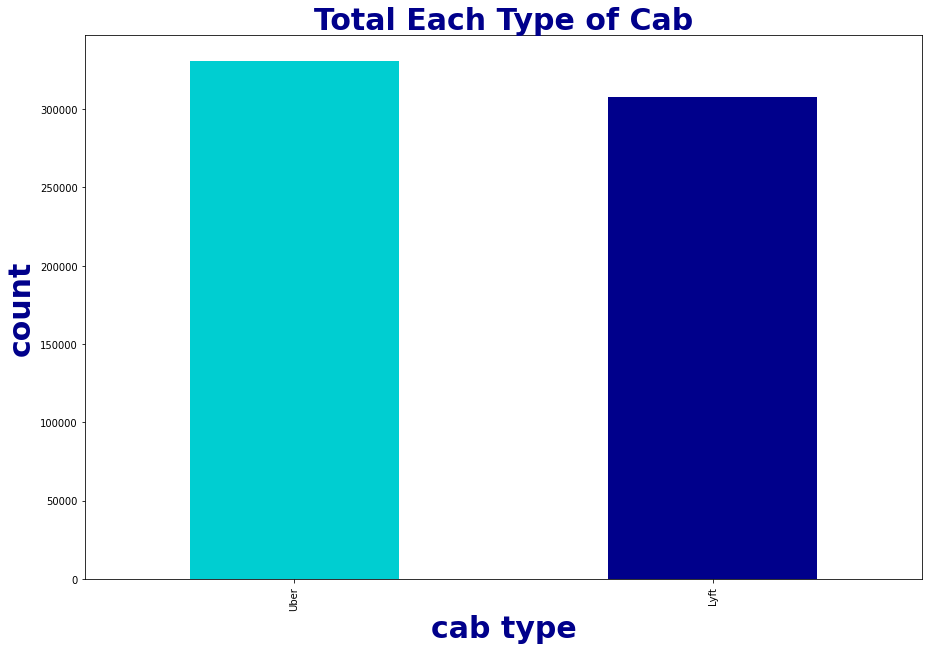

In [15]:
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 30,
        }

cabtype_count.plot(kind='bar', figsize=(15,10), color=['darkturquoise', 'darkblue'])

plt.title('Total Each Type of Cab', fontdict=font1)
plt.ylabel('count', fontdict=font1)
plt.xlabel('cab type', fontdict=font1)

Berdasarkan bar chart di atas, dapat diketahui bahwa taksi online yang paling banyak digunakan oleh penumpang adalah taksi online tipe Uber dengan total penumpang 330568 dan Lyft dengan total penumpang 307408.

In [16]:
# Perbandingan jenis taksi Uber dan Lyft terhadap tarif perjalanan
df.groupby(['cab_type', 'name']).mean()['price']

cab_type  name        
Lyft      Lux             17.771240
          Lux Black       23.062468
          Lux Black XL    32.324086
          Lyft             9.610885
          Lyft XL         15.309363
          Shared           6.029893
Uber      Black           20.523786
          Black SUV       30.286763
          UberPool         8.752500
          UberX            9.765074
          UberXL          15.678144
          WAV              9.765019
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='name'>

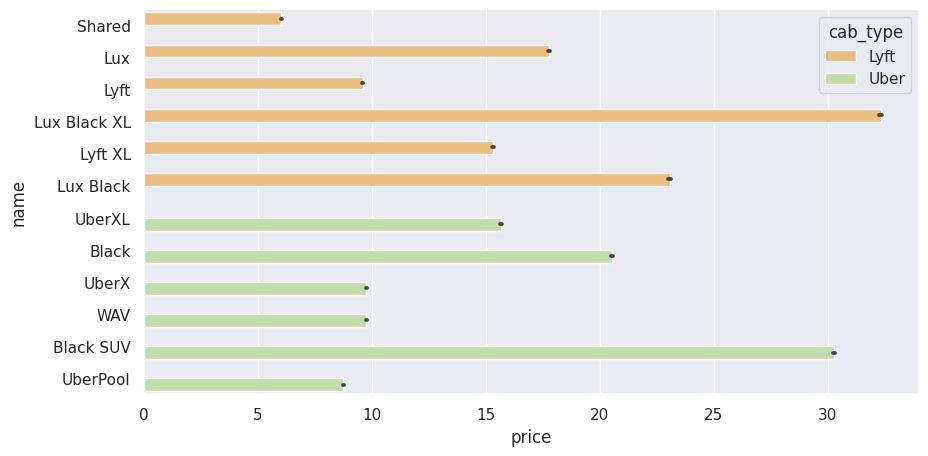

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y='name', x='price', data=df, hue='cab_type', palette='Spectral')

Berdasarkan bar chart di atas, dapat diketahui bahwa taksi Lyft yang memiliki rata-rata harga paling mahal adalah Lux Black Xl. Sedangkan Shared adalah jenis taksi Lyft yang memiliki rata-rata harga paling murah.

Sementara itu, taksi uber yang memiliki rata-rata harga paling mahal adalah Black SUV. Sedangkan UberPool adalah jenis taksi Uber yang memiliki rata-rata harga paling murah

In [17]:
# Perbandingan penggunaan jenis taksi terhadap jam
hour_cabtype = df.groupby(['hour', 'cab_type']).size()
hour_cabtype


hour  cab_type
0     Lyft        14657
      Uber        15215
1     Lyft        12669
      Uber        13641
2     Lyft        12548
      Uber        13775
3     Lyft        12224
      Uber        13306
4     Lyft        12502
      Uber        13623
5     Lyft        11155
      Uber        11840
6     Lyft        11935
      Uber        13212
7     Lyft        11024
      Uber        11906
8     Lyft        10700
      Uber        11637
9     Lyft        12948
      Uber        13725
10    Lyft        13325
      Uber        14593
11    Lyft        13372
      Uber        14574
12    Lyft        13633
      Uber        14384
13    Lyft        13503
      Uber        14474
14    Lyft        13306
      Uber        14670
15    Lyft        13394
      Uber        14474
16    Lyft        13349
      Uber        14623
17    Lyft        13853
      Uber        14222
18    Lyft        13404
      Uber        14554
19    Lyft        12461
      Uber        12949
20    Lyft        11715
 

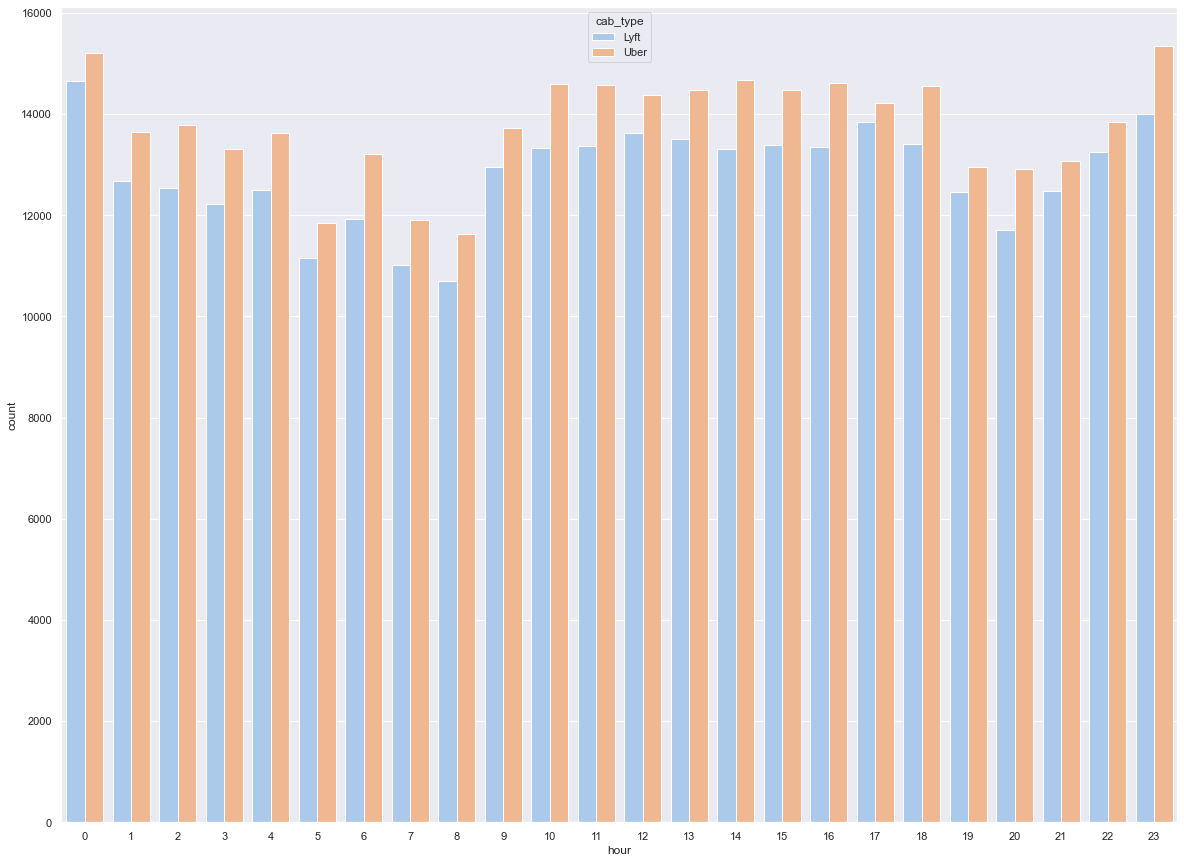

In [18]:
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(x='hour', data=df, palette='pastel', hue='cab_type');

Berdasarkan visualisasi di atas, dapat diketahui bahwa pemakaian taksi online jenis Lyft paling banyak digunakan di sekitar pukul 00. Sedangkan pemakaian taksi online jenis Uber paling banyak digunakan di sekitar pukul 23

### Month Analysis

In [19]:
# Perbandingan penggunaan taksi terhadap bulan
month_count= df['month'].value_counts()
month_count

12    374205
11    263771
Name: month, dtype: int64

Text(0.5, 1.15, 'December vs November Percentage')

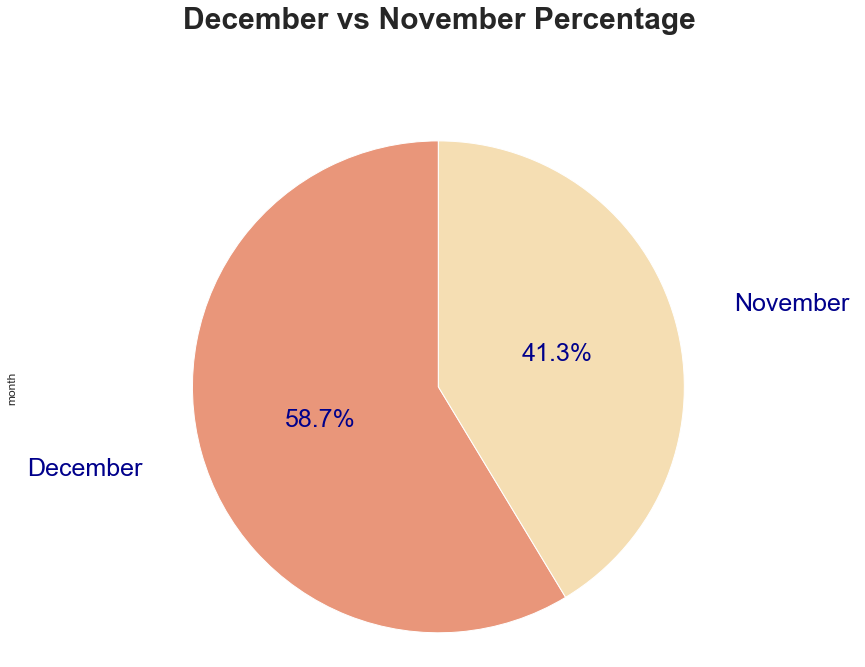

In [20]:
lable=['December', 'November']

ax = plt.axes()
ax.set_facecolor("lightblue")

month_count.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=0.5,
    labels = lable,
    labeldistance = 1.25,
    colors = ['darksalmon', 'wheat'],
    textprops={'fontsize': 25,'color':'darkblue'})
    
plt.axis('equal')
plt.title("December vs November Percentage", y=1.15, weight='bold',size='30')

Berdasarkan pie chart di atas, dapat diketahui bahwa pemakaian taksi online terbanyak, yaitu sebesar 58.7% berada pada bulan Desember. Sedangkan sisanya sebanyak 41.3% berada pada bulan November

In [21]:
# Perbandingan penggunaan taksi terhadap cuaca 
shortsum_cabtype= df.groupby(['short_summary', 'cab_type']).size()
shortsum_cabtype

short_summary       cab_type
 Clear              Lyft         38653
                    Uber         41603
 Drizzle            Lyft          3111
                    Uber          3614
 Foggy              Lyft          4002
                    Uber          4290
 Light Rain         Lyft         24328
                    Uber         26160
 Mostly Cloudy      Lyft         64720
                    Uber         69883
 Overcast           Lyft         97416
                    Uber        104013
 Partly Cloudy      Lyft         56663
                    Uber         60563
 Possible Drizzle   Lyft          8072
                    Uber          9104
 Rain               Lyft         10443
                    Uber         11338
dtype: int64

Text(0, 0.5, 'Count')

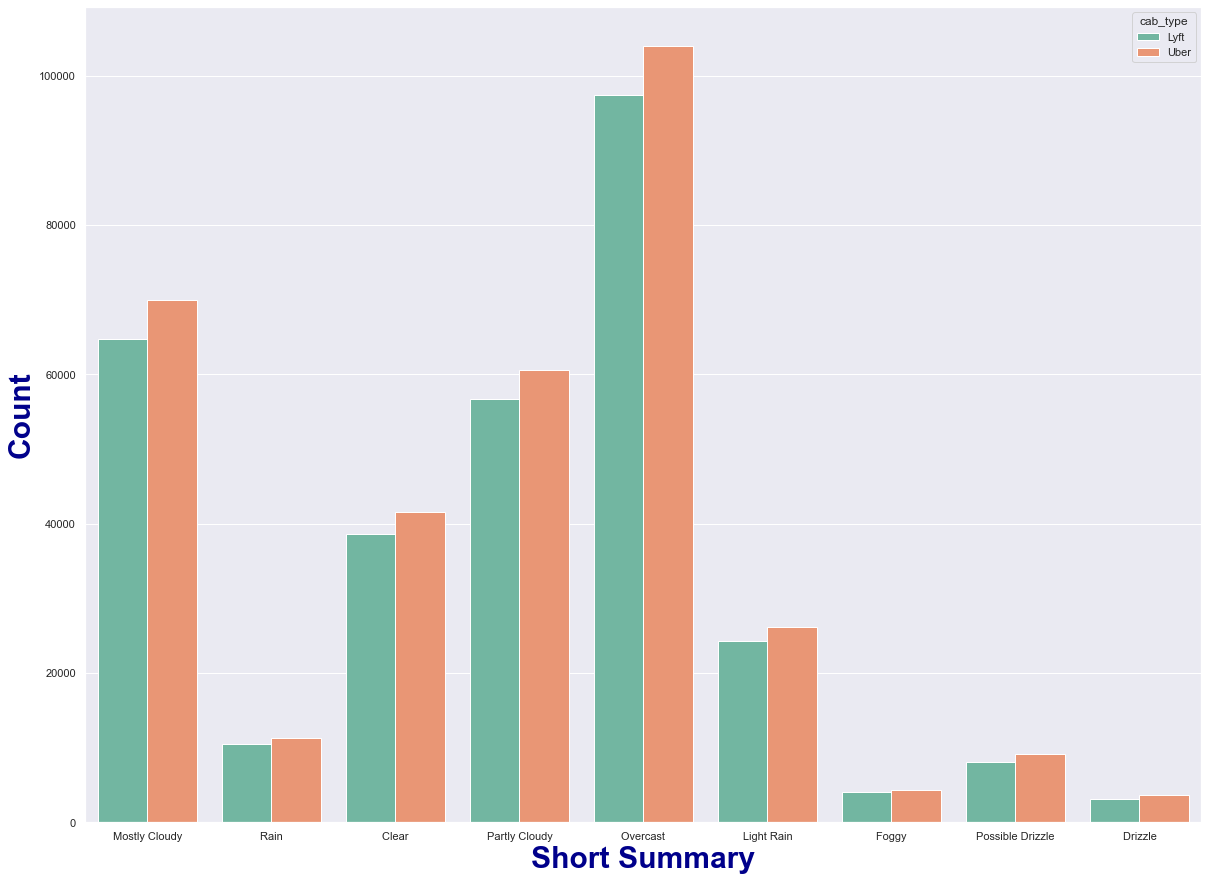

In [22]:
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(x='short_summary', data=df, palette='Set2', hue='cab_type');
plt.xlabel('Short Summary', fontdict=font1)
plt.ylabel('Count', fontdict=font1)

Berdasarkan visualisasi di atas, dapat diketahui bahwa pemakaian taksi online jenis Lyft dan Uber paling banyak saat cuaca overcast. Cuaca mendung biasanya menandakan hujan akan turun. Oleh karena itu, untuk menghindari kehujanan, orang-orang biasanya menggunakan taksi online untuk berpergian ke suatu tempat

### Price Analysis

In [23]:
# Perbandingan rute perjalanan taksi terhadap harga
pd.set_option('display.max_rows', 72)
df.groupby(["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Berdasarkan tabel tersebut, dapat diketahui bahwa rute taksi dari Financial District ke Boston University memiliki harga rata-rata termahal. Sedangkan, perjalanan taksi dengan harga termurah adalah dari Haymarket Square ke North Station

## Data Preprocessing

In [24]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Selecting Columns

In [25]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax= plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

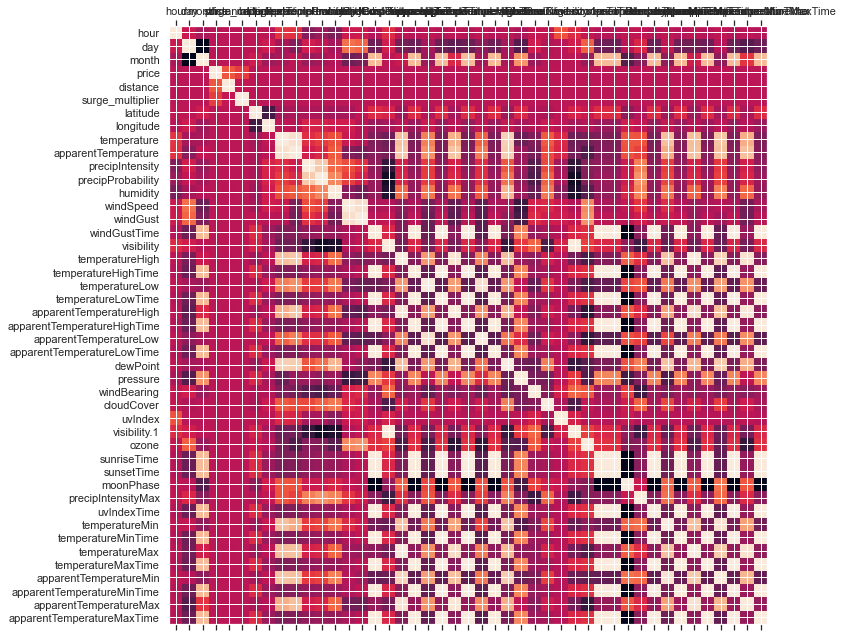

In [26]:
plot_corr(df)

In [ ]:
df.corr()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0.173454,-0.002187,0.172724,-0.130576,0.149323,-0.032467,-0.064560,0.010339,0.124286,0.063350,0.171873,0.171851,-0.199608,-0.047307,0.171976,-0.114437,0.169740,-0.109271,0.175336,-0.096327,0.171069,-0.082894,0.173359
longitude,-0.005986,0.078539,-0.126763,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.012402,-0.005897,0.130794,0.122212,0.090731,0.092773,-0.006145,-0.137020,-0.097102,0.007682,-0.136469,0.077802,-0.135908,-0.001465,-0.136121,0.018958,-0.137076,0.056269,-0.085849,-0.034433,0.073642,0.009943,-0.097102

In [27]:
df = df[['cab_type','name','source', 'destination','distance', 'short_summary','surge_multiplier', 'price', 'visibility', 'windBearing', 'moonPhase']]


Berdasarkan tabel korelasi dan visualisasi dengan Heatmap di atas, dilakukan pemilihan kolom yang memiliki nilai korelasi tinggi terhadap variabel price. Kolom yang dipilih adalah kolom dengan nilai korelasi yang tidak mendekati 0 karena nilai korelasi yang mendekati 0 menandakan bahwa variabel independen tersebut berpengaruh rendah terhadap variabel dependennya

<AxesSubplot:>

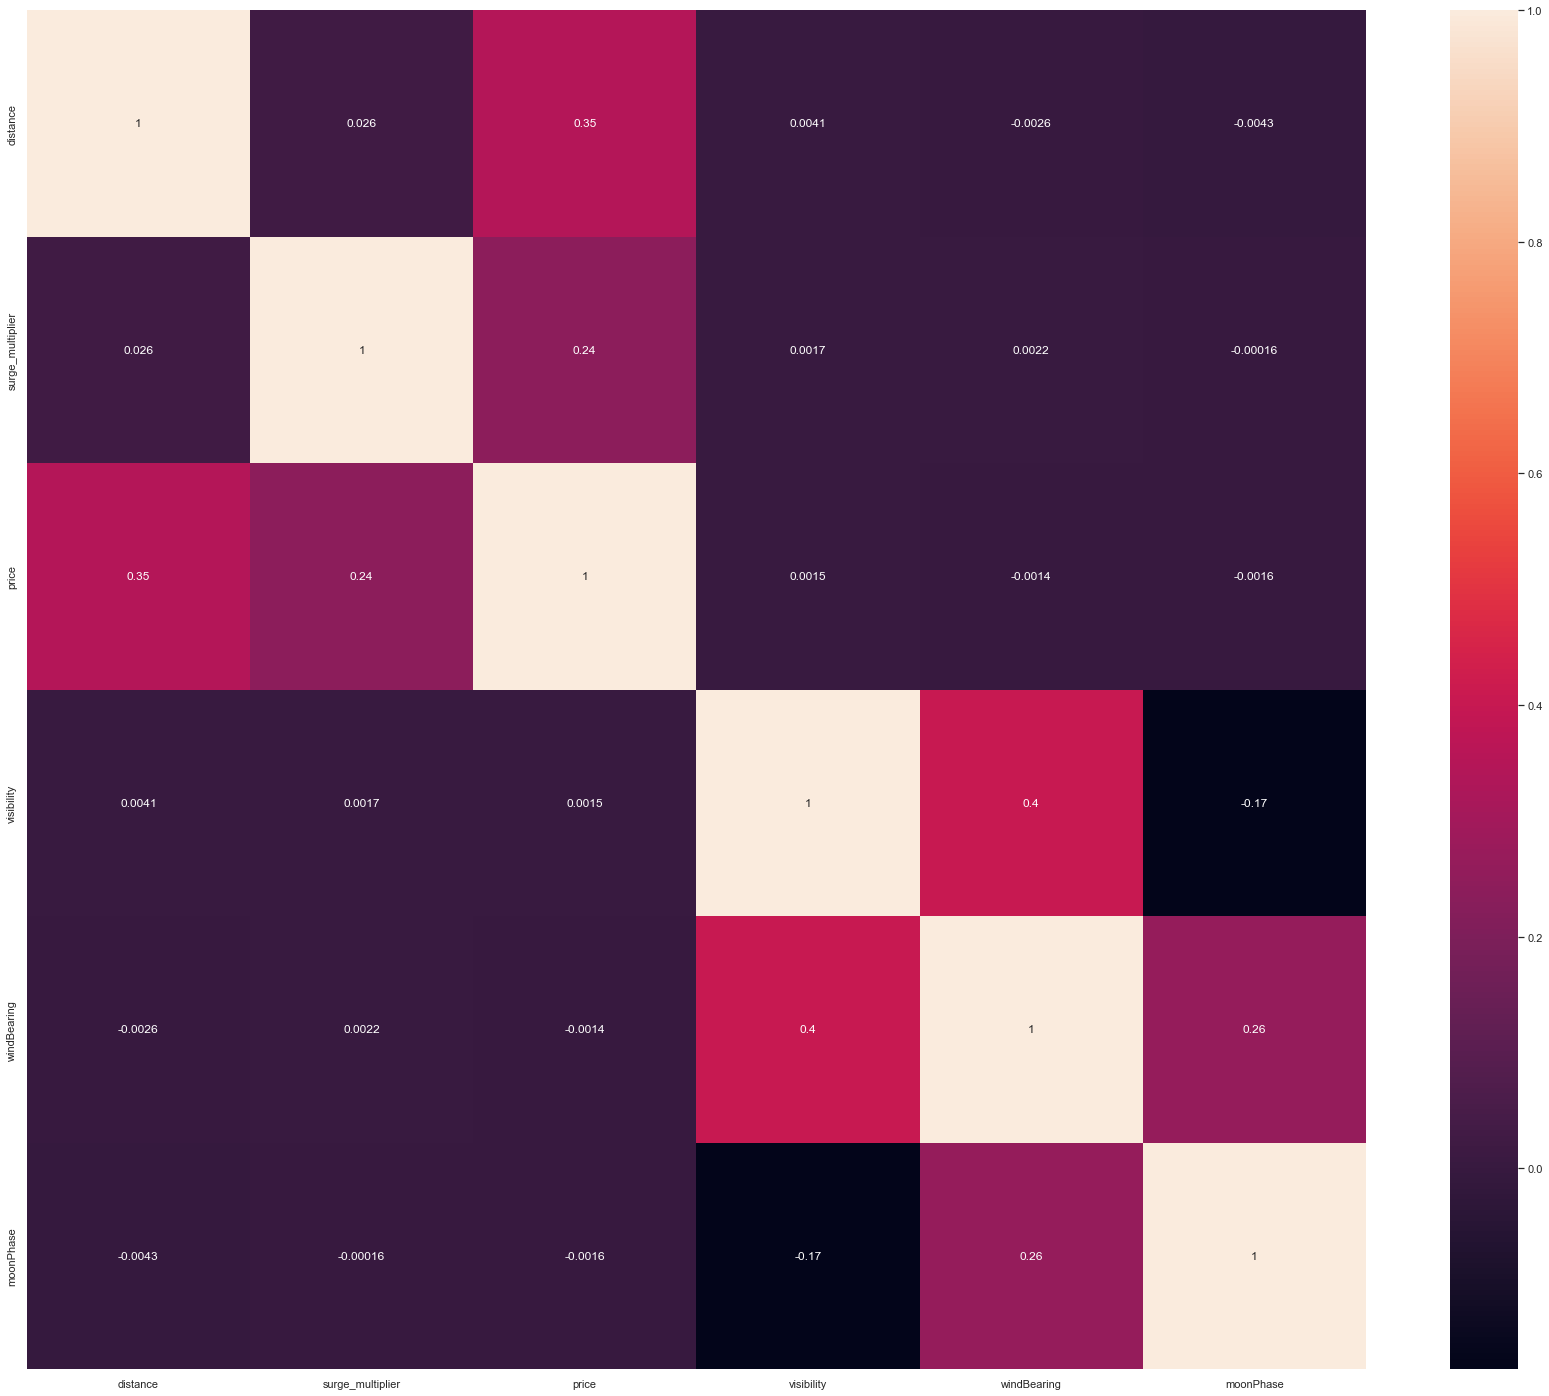

In [28]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)

In [29]:
#Melakukan encoding dengan One Hot Encoder pada atribut yang memiliki tipe data Object.
def one_hot_encoder(df,feature,keep_first=True):
    one_hot_cols = pd.get_dummies(df[feature])
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_df = pd.concat([df,one_hot_cols],axis=1)
    new_df.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_df=new_df.iloc[:,1:]
    
    return new_df

df_copy = df.copy()
for col in df_copy.select_dtypes(include='O').columns:
    df_copy=one_hot_encoder(df_copy,col)

df_copy.head()

,distance,surge_multiplier,price,visibility,windBearing,moonPhase,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.44,1.0,5.0,10.000,57,0.30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,4.786,90,0.64,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,7.0,10.000,240,0.68,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.44,1.0,26.0,10.000,310,0.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.44,1.0,9.0,10.000,303,0.72,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Split the data into input and target
X = df_copy.drop(columns=['price'])
y = np.log(df_copy['price'])

print(X.shape)
print(y.shape)

(637976, 52)
(637976,)


In [31]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=200)

## Modelling 

### Linear Regression

In [32]:
# Create Linear regression Model
model_LR = LinearRegression()

# Train the Model
model_LR.fit(X_train, y_train)

print('Intercept:', model_LR.intercept_)
print('Coefficients: ', model_LR.coef_)
print('Coefficient of Determination: ', model_LR.score(X_test, y_test))

Intercept: 258328179.51436585
Coefficients:  [ 1.75101516e-01  7.01028641e-01 -1.21584348e-04  1.42708209e-06
 -8.37273710e-04 -4.19283015e+07 -3.63338671e+07 -1.15652940e+07
 -1.15652936e+07 -5.97085975e+06 -5.97085948e+06 -5.97085913e+06
 -5.97086036e+06 -5.97085990e+06 -5.97086083e+06 -1.15652949e+07
 -1.15652948e+07 -1.15652943e+07 -1.15652948e+07 -1.70012981e+07
 -1.70012981e+07 -1.45313714e+08 -1.45313714e+08 -1.70012981e+07
 -1.45313714e+08 -1.45313714e+08 -1.70012981e+07 -1.45313714e+08
 -1.45313714e+08 -1.70012981e+07 -1.70012981e+07 -9.09429553e+07
 -9.09429553e+07 -2.19255371e+08 -2.19255371e+08 -9.09429553e+07
 -2.19255371e+08 -2.19255371e+08 -9.09429553e+07 -2.19255371e+08
 -2.19255371e+08 -9.09429553e+07 -9.09429553e+07  2.58276526e+07
  2.58276526e+07  2.58276526e+07  2.58276526e+07  2.58276526e+07
  2.58276526e+07  2.58276526e+07  2.58276526e+07  2.58276526e+07]
Coefficient of Determination:  0.9381195942147522


Berdasarkan model linear regression di atas, dapat diketahui bahwa nilai intercept atau b0 adalah 258328179.5 yang mana menggambarkan bahwa model tersebut memprediksi respons 258328179.5 ketika x adalah 0. Sementara itu, nilai b1 adalah 1.75101516e-01 yang berarti respons yang diprediksi naik 1.75101516e-01 ketika x1 naik 1 dan seterusnya
Model ini memiliki nilai akurasi yang cukup tinggi yaitu sebesar 93.81%.


In [33]:
# Predict the Response
y_predLR = model_LR.predict(X_test)
print('Predicted Response: ', y_predLR, sep='\n')

LR_mse = mean_squared_error(y_predLR, y_test)
LR_rmse = np.sqrt(LR_mse)
print('RMSE: %.4f' % LR_rmse)

Predicted Response: 
[2.22092694 2.15797243 3.02612063 ... 1.95230499 2.26410758 2.35893646]
RMSE: 0.1413


Setelah model yang dibuat memuaskan dapat digunakan kembali untuk memprediksi dengan data yang baru. Adapun respon dari prediksi yang dibuat menunjukkan rata-rata(RMSE) sebesar 0.1413. Artinya, rata-rata kesalahan yang berkaitan dengan penyimpangan dari nilai sebenarnya adalah rendah. Model dan prediksi yang dibuat sudah mendekati angka 0 menunjukkan bahwa model memiliki kecocokan yang hampir sempurna, dan model serta prediksi tersebut sudah baik.

### Random Forest Regressor

In [ ]:
model_RF = RandomForestRegressor(n_estimators=50)

# Train the Model
model_RF.fit(X_train, y_train)

# Predict the Response
y_predRF = model_RF.predict(X_test)

print('Random Forest test R squared: ', model_LR.score(X_test, y_test))

RF_mse = mean_squared_error(y_predRF, y_test)
RF_rmse = np.sqrt(RF_mse)
print('RMSE: %.4f' % RF_rmse)

Random Forest test R squared:  0.9381195956280607
RMSE: 0.1323


Training data menggunakan Algoritma Random Forest Regessor menghasilkan score sebesar 0,938 atau dengan persentase 93.81 % dan rata-rata(RMSE) sebesar 0.1323. Artinya, rata-rata kesalahan yang berkaitan dengan penyimpangan dari nilai sebenarnya adalah rendah. Hal ini menunjukkan bahwa model ini dapat digunakan untuk memprediksi data pada dataset rideshare-kaggle.csv dengan tingkat akurasi yang cukup tinggi.

### KNeighbors Regressor

In [ ]:
n_neighbors = 9
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    y_predknn = knn.predict(X_test)
print('KNeighbors Regressor R squared: ', explained_variance_score(y_test, y_predknn))
KNN_mse = mean_squared_error(y_test, y_predknn)
KNN_rmse = np.sqrt(KNN_mse)
print('RMSE: %.4f' % KNN_rmse)  

KNeighbors Regressor R squared:  0.8042123868875177
RMSE: 0.2516


Berdasarkan hasil training menggunakan algoritma KNeighbor Regessor di atas, diperoleh nilai 0.8042 atau sebesar 80.42% dengan RMSE 0.2516, yang menunjukkan bahwa algoritma ini cukup baik untuk digunakan, namun hasil yang diperoleh masih terbilang rendah jika dibandingkan dengan algoritma-algoritma sebelumnya.

### Decision Tree

In [ ]:
dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, y_train)

y_pred2 = dt_model.predict(X_test)
l_dt_train_r2 = dt.score(X_train,y_train)
l_dt_test_r2 = dt.score(X_test, y_test)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

dt_mse = mean_squared_error(y_pred2, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree test R squared": 0.8937
Decision Tree Regressor RMSE: 0.1837


Model Decision Tree yang di atas mendapatkan hasil yang cukup baik yaitu sebesar 0.8937 atau 89.37%, dengan RMSE 0.1837 Hasil ini menunjukkan bahwa algoritma decision tree cukup baik digunakan untuk memprediksi. Hasil yang diperoleh lebih tinggi dibandingkan dengan KNeighbor, walaupun masih lebih rendah dibandingkan linear regression dan Random Forest Regressor.

## Kesimpulan

1. Dari 57 atribut yang ada, diambil 10 atribut yang paling berpengaruh dalam 
prediksi harga taksi online, diantaranya adalah cab_type, name, source, destination, distance, short_summary, surge_multiplier, visibility, windBearing, moonPhase
2.  Dari model dan prediksi yang sudah dibuat, model yang paling akurat yang sudah dibuat adalah model Random Forest dengan nilai akurasi yang cukup tinggi yaitu sebesar 93.81%. Dengan Root Mean Squared Error (RMSE) sebesar 0.1323. Model dan prediksi yang dibuat sudah mendekati angka 0 menunjukkan bahwa model memiliki kecocokan yang hampir sempurna, dan model serta prediksi tersebut sudah baik.